### Final project on Unsupervised Machine Learning

#### Analysis the Breast Cancer Dataset

#### Introdcution and Dataset Description
##### Source:
The breast cancer dataset to be used in this analysis was obtained from the University Medical Centre, Institute of Oncology, Ljubljana, Yugoslavia. Downloaded from the University of California (UCI) Machine Learning Repository. Link- https://archive.ics.uci.edu/ml/datasets/breast+cancer

##### Description:
The dataset includes 201 instances of benign class (non-cancerous) and 85 instances of the malignant class (Cancerous). The instances are described by 9 attributes, some of which are linear and some are nominal. They include:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler

In [2]:
columns = ['Class','age','menopause','tumor_size','inv_nodes','node_caps','deg_malig','breast','breast_quad','irradiat']
url = 'Datasets/breast_cancer.DATA'
df = pd.read_csv(url, names = columns)

df.head(5)

,Class,age,menopause,tumor_size,inv_nodes,node_caps,deg_malig,breast,breast_quad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Class        286 non-null    object
 1   age          286 non-null    object
 2   menopause    286 non-null    object
 3   tumor_size   286 non-null    object
 4   inv_nodes    286 non-null    object
 5   node_caps    286 non-null    object
 6   deg_malig    286 non-null    int64 
 7   breast       286 non-null    object
 8   breast_quad  286 non-null    object
 9   irradiat     286 non-null    object
dtypes: int64(1), object(9)
memory usage: 22.5+ KB


In [4]:
df1 = df.drop(['Class'], axis = 1)

In [5]:
missing_values = df1[df1['node_caps'].isin(['?'])].index.tolist()
missing_values

[145, 163, 164, 183, 184, 233, 263, 264]

In [6]:
missing_values2 = df[df['breast_quad'].isin(['?'])].index.tolist()
missing_values2

[206]

In [7]:
m_v = missing_values + missing_values2

In [8]:
df1 = df1.drop(m_v)
df1

,age,menopause,tumor_size,inv_nodes,node_caps,deg_malig,breast,breast_quad,irradiat
0,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,40-49,premeno,0-4,0-2,no,2,right,right_low,no
...,...,...,...,...,...,...,...,...,...
281,30-39,premeno,30-34,0-2,no,2,left,left_up,no
282,30-39,premeno,20-24,0-2,no,3,left,left_up,yes
283,60-69,ge40,20-24,0-2,no,1,right,left_up,no
284,40-49,ge40,30-34,3-5,no,3,left,left_low,no


In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 277 entries, 0 to 285
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          277 non-null    object
 1   menopause    277 non-null    object
 2   tumor_size   277 non-null    object
 3   inv_nodes    277 non-null    object
 4   node_caps    277 non-null    object
 5   deg_malig    277 non-null    int64 
 6   breast       277 non-null    object
 7   breast_quad  277 non-null    object
 8   irradiat     277 non-null    object
dtypes: int64(1), object(8)
memory usage: 21.6+ KB


In [10]:
df1_le = df1.columns.tolist()

le = LabelEncoder()

for col in df1_le:
    
    if col != 'deg_malig':
        df1[col] = le.fit_transform(df1[col])
    else:
        continue
        
df1

,age,menopause,tumor_size,inv_nodes,node_caps,deg_malig,breast,breast_quad,irradiat
0,1,2,5,0,0,3,0,1,0
1,2,2,3,0,0,2,1,4,0
2,2,2,3,0,0,2,0,1,0
3,4,0,2,0,0,2,1,2,0
4,2,2,0,0,0,2,1,3,0
...,...,...,...,...,...,...,...,...,...
281,1,2,5,0,0,2,0,2,0
282,1,2,3,0,0,3,0,2,1
283,4,0,3,0,0,1,1,2,0
284,2,0,5,4,0,3,0,1,0


In [11]:
scaler = StandardScaler()

df1= scaler.fit_transform(df1)
tops = ['age','menopause','tumor_size','inv_nodes','node_caps','deg_malig','breast','breast_quad','irradiat']
df1 = pd.DataFrame(df1, columns = tops)
df1

,age,menopause,tumor_size,inv_nodes,node_caps,deg_malig,breast,breast_quad,irradiat
0,-1.629078,0.918558,0.428346,-0.541560,-0.503382,1.293094,-0.954120,-0.718397,-0.537003
1,-0.637310,0.918558,-0.491435,-0.541560,-0.503382,-0.079270,1.048086,2.020079,-0.537003
2,-0.637310,0.918558,-0.491435,-0.541560,-0.503382,-0.079270,-0.954120,-0.718397,-0.537003
3,1.346227,-1.108857,-0.951326,-0.541560,-0.503382,-0.079270,1.048086,0.194428,-0.537003
4,-0.637310,0.918558,-1.871107,-0.541560,-0.503382,-0.079270,1.048086,1.107254,-0.537003
...,...,...,...,...,...,...,...,...,...
272,-1.629078,0.918558,0.428346,-0.541560,-0.503382,-0.079270,-0.954120,0.194428,-0.537003
273,-1.629078,0.918558,-0.491435,-0.541560,-0.503382,1.293094,-0.954120,0.194428,1.862187
274,1.346227,-1.108857,-0.491435,-0.541560,-0.503382,-1.451634,1.048086,0.194428,-0.537003
275,-0.637310,-1.108857,0.428346,1.593842,-0.503382,1.293094,-0.954120,-0.718397,-0.537003


### Now using the first clustering technique KMEANS

In [12]:
from sklearn.cluster import KMeans
random_state = 42
n_clusters = 2
km = KMeans(n_clusters = n_clusters, random_state = random_state)
km = km.fit(df1)

df1['kmeans'] = km.predict(df1)

In [13]:
df1.kmeans.value_counts()

0    210
1     67
Name: kmeans, dtype: int64

In [14]:
df1.kmeans.unique()

array([0, 1])

In [15]:
km_list = []

for clust in range(1,21):
    km = KMeans(n_clusters = clust, random_state = random_state)
    km = km.fit(df1)
    
    km_list.append(pd.Series({'clusters': clust,
                             'inertia': km.inertia_,
                             'model':km}))



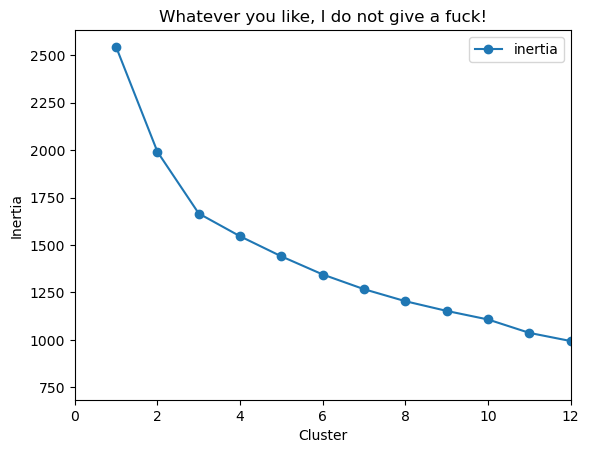

In [16]:
plot_data = (pd.concat(km_list, axis = 1).T[['clusters','inertia']].set_index('clusters'))

ax = plot_data.plot(marker = 'o', ls = '-')
ax.set_xticks(range(0,21,2))
ax.set_xlim(0,12)
ax.set(xlabel = 'Cluster', ylabel = 'Inertia', title = 'Whatever you like, I do not give a fuck!');

### Testing out Kmeans using the RandomForestClassifier

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import StratifiedShuffleSplit, train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y = df1['kmeans']
X = df1.drop(['kmeans'], axis = 1)

In [18]:
def measure_error(ytest, ypred, label): 
    return pd.Series({'accuracy':accuracy_score(ytest, ypred),
                      'f1': f1_score(ytest, ypred)}, name = label)



In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = random_state, stratify = y)
estimator = RandomForestClassifier()
estimator.fit(X_train, y_train)
y_predRan = estimator.predict(X_test)
#y_prob_pred = estimator.predict_proba(X_test)

pd.DataFrame(measure_error(y_test, y_predRan, 'RandomForest with Kmeans'))
#roc = roc_auc_score(y_test, y_prob_pred, multi_class='ovr')
#print('The ROC score with Kmeans and RandomForestclassifier is:', round(roc, 4)*100)

,RandomForest with Kmeans
accuracy,0.964286
f1,0.923077


### Testing out Kmeans using Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression
estimatorReg = LogisticRegression()
estimatorReg.fit(X_train, y_train)

y_predReg = estimatorReg.predict(X_test)

pd.DataFrame(measure_error(y_test, y_predReg, 'LogisticRegression with Kmeans'))
#y_prob_pred = estimatorReg.predict_proba(X_test)
#roc = roc_auc_score(y_test, y_prob_pred, multi_class='ovr')
#print('The ROC score with Kmeans and LogisticRegression is:', round(roc, 4)*100)

,LogisticRegression with Kmeans
accuracy,0.988095
f1,0.974359


### Using the second clustering technique 'Agglomerative Clustering'

In [28]:
from sklearn.cluster import AgglomerativeClustering

Ag = AgglomerativeClustering(n_clusters = 2,
                            linkage = 'ward',
                            compute_full_tree = True)
Ag.fit(df1)
df1['Agglo'] = Ag.fit_predict(df1)

In [29]:
df1.Agglo.value_counts()

0    182
1     95
Name: Agglo, dtype: int64

In [30]:
df1

,age,menopause,tumor_size,inv_nodes,node_caps,deg_malig,breast,breast_quad,irradiat,kmeans,Agglo
0,-1.629078,0.918558,0.428346,-0.541560,-0.503382,1.293094,-0.954120,-0.718397,-0.537003,0,0
1,-0.637310,0.918558,-0.491435,-0.541560,-0.503382,-0.079270,1.048086,2.020079,-0.537003,0,0
2,-0.637310,0.918558,-0.491435,-0.541560,-0.503382,-0.079270,-0.954120,-0.718397,-0.537003,0,0
3,1.346227,-1.108857,-0.951326,-0.541560,-0.503382,-0.079270,1.048086,0.194428,-0.537003,0,1
4,-0.637310,0.918558,-1.871107,-0.541560,-0.503382,-0.079270,1.048086,1.107254,-0.537003,0,0
...,...,...,...,...,...,...,...,...,...,...,...
272,-1.629078,0.918558,0.428346,-0.541560,-0.503382,-0.079270,-0.954120,0.194428,-0.537003,0,0
273,-1.629078,0.918558,-0.491435,-0.541560,-0.503382,1.293094,-0.954120,0.194428,1.862187,0,0
274,1.346227,-1.108857,-0.491435,-0.541560,-0.503382,-1.451634,1.048086,0.194428,-0.537003,0,1
275,-0.637310,-1.108857,0.428346,1.593842,-0.503382,1.293094,-0.954120,-0.718397,-0.537003,1,0


### Testing out AgglomerativeClustering using the RandomForestClassifier

In [31]:
y = df1['Agglo']
X = df1.drop(['kmeans', 'Agglo'], axis = 1)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = random_state, stratify = y)
estimatorAgRan = RandomForestClassifier()
estimatorAgRan.fit(X_train, y_train)
y_predAgRan = estimatorAgRan.predict(X_test)
#y_prob_pred = estimatorAgRan.predict_proba(X_test)

pd.DataFrame(measure_error(y_test, y_predAgRan, 'RandomForest with AggloClustering'))
#roc = roc_auc_score(y_test, y_prob_pred, multi_class='ovr')
#print('The ROC score with Agglo and RandomForestClassifier is:', round(roc, 4)*100)

,RandomForest with AggloClustering
accuracy,0.952381
f1,0.931034


### Testing out AgglomerativeClustering using Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression
estimatorRegAg = LogisticRegression()
estimatorRegAg.fit(X_train, y_train)

y_predRegAg = estimatorRegAg.predict(X_test)
pd.DataFrame(measure_error(y_test, y_predRegAg, 'LogisticRegression with AggloClustering'))
#y_prob_pred = estimatorRegAg.predict_proba(X_test)
#roc = roc_auc_score(y_test, y_prob_pred, multi_class='ovr')
#print('The ROC score with Agglo and LogisticRegression is:', round(roc, 4)*100)

,LogisticRegression with AggloClustering
accuracy,0.952381
f1,0.931034


### Now using the original dataset wothout Kmeans using first RandomForest then LogisticRegression

In [34]:
df1['Class'] = df['Class']

In [35]:
df1['Class']  = le.fit_transform(df1['Class']);


In [36]:
y_ori = df1['Class']
X_ori = df1.drop(['kmeans', 'Agglo', 'Class'], axis = 1)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X_ori, y_ori, test_size=0.3, random_state = random_state, stratify = y)
#staring with RandomForest

estimator_Ori = RandomForestClassifier()
estimator_Ori.fit(X_train, y_train)
y_pred_ori = estimator_Ori.predict(X_test)
#y_prob_pred = estimatorAgRan.predict_proba(X_test)

pd.DataFrame(measure_error(y_test, y_pred_ori, 'RandomForest with Orignal Data features and class'))

,RandomForest with Orignal Data features and class
accuracy,0.714286
f1,0.368421


In [38]:
#Next is LogosticRegression
X_train, X_test, y_train, y_test = train_test_split(X_ori, y_ori, test_size=0.3, random_state = random_state, stratify = y)

estimator_oriReg = LogisticRegression()
estimator_oriReg.fit(X_train, y_train)
y_pred_oriReg = estimator_oriReg.predict(X_test)
#y_prob_pred = estimatorAgRan.predict_proba(X_test)

pd.DataFrame(measure_error(y_test, y_pred_oriReg, 'LogisticRegression with Orignal Data features and class'))

,LogisticRegression with Orignal Data features and class
accuracy,0.690476
f1,0.315789


#### End of project